## Final Project Submission

Please fill out:
* Student name: Kosta Tzioumis
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Eli
* Blog post URL:


## Data Set obtained from:
https://www.kaggle.com/cityofLA/los-angeles-metro-bike-share-trip-data

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
df=pd.read_csv('metro-bike-share-trip-data.csv')
df.head(10)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9378284,60,2016-10-09T09:40:00.000,2016-10-09T09:41:00.000,NaN,NaN,NaN,NaN,NaN,NaN,...,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21784648,14760,2017-03-10T17:38:00.000,2017-03-10T21:44:00.000,3065.0,34.060558,-118.238327,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22506739,79020,2017-03-17T19:20:00.000,2017-03-18T17:17:00.000,3063.0,34.049198,-118.252831,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20889067,86400,2017-02-26T12:18:00.000,2017-02-27T12:36:00.000,3062.0,34.047749,-118.243172,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18481915,600,2017-01-23T18:48:00.000,2017-01-23T18:58:00.000,3082.0,34.046520,-118.237411,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
df.shape

(132427, 22)

Feature descriptions from https://bikeshare.metro.net/about/data/

<b>trip_id:</b> Locally unique integer that identifies the trip

<b>duration:</b> Length of trip in <i> minutes*</i>

<b>start_time:</b> The date/time when the trip began, presented in ISO 8601 format in local time

<b>end_time: </b>The date/time when the trip ended, presented in ISO 8601 format in local time

<b>start_station:</b> The station ID where the trip originated 

<b>start_lat:</b> The latitude of the station where the trip originated

<b>start_lon: </b>The longitude of the station where the trip originated

<b>end_station: </b>The station ID where the trip terminated 

<b>end_lat: </b>The latitude of the station where the trip terminated

<b>end_lon: </b>The longitude of the station where the trip terminated

<b>bike_id: </b> Locally unique integer that identifies the bike
    
<b>plan_duration: </b>The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)

<b>trip_route_category:</b> "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips

<b>passholder_type: </b>The name of the passholder's plan

*units are actually in but each instance is a multiple of 60 i.e. a whole minute number. We will convert this to minutes

Other features are not officially described by Metro Bike Share

Starting Lat-Long and Ending Lat-Long appear to be repetitions of previous station data and can be dropped safely

Remaining features appear to be LA geographic information not relevant to this study, many of which include large amounts of missing data. These will  also be dropped.

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
Trip ID                              132427 non-null int64
Duration                             132427 non-null int64
Start Time                           132427 non-null object
End Time                             132427 non-null object
Starting Station ID                  132408 non-null float64
Starting Station Latitude            132379 non-null float64
Starting Station Longitude           132379 non-null float64
Ending Station ID                    132331 non-null float64
Ending Station Latitude              131376 non-null float64
Ending Station Longitude             131376 non-null float64
Bike ID                              132417 non-null float64
Plan Duration                        131661 non-null float64
Trip Route Category                  132427 non-null object
Passholder Type                      132427 non-null object
Starting Lat-Long                    98622 

In [247]:
df.isna().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                      19
Starting Station Latitude                48
Starting Station Longitude               48
Ending Station ID                        96
Ending Station Latitude                1051
Ending Station Longitude               1051
Bike ID                                  10
Plan Duration                           766
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     33805
Ending Lat-Long                        1051
Neighborhood Councils (Certified)     33837
Council Districts                     33837
Zip Codes                             33837
LA Specific Plans                    116590
Precinct Boundaries                    1099
Census Tracts                          1099
dtype: int64

In [248]:
df.drop(columns=['Starting Lat-Long',
                 'Ending Lat-Long',
                 'Neighborhood Councils (Certified)',
                 'Council Districts',
                 'Zip Codes',
                 'LA Specific Plans',
                 'Precinct Boundaries',
                 'Census Tracts'],
       inplace=True)
df.Duration=df.Duration/60

In [249]:
df.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type
0,18222186,251.0,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,5944.0,0.0,One Way,Walk-up
1,9518671,1286.0,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,6603.0,30.0,One Way,Monthly Pass
2,20444932,1440.0,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,5879.0,0.0,One Way,Walk-up
3,20905031,314.0,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,6056.0,0.0,One Way,Walk-up
4,21031476,1440.0,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,6054.0,365.0,One Way,Flex Pass


Trip ID can be used is a unique identifier and can be used as an index for this data.

Remaining features had little missing data the largest source being just 1051 missing cells from over 132,000. Rows with missing data can be safely dropped from the datasets.

Start Time and End Time will be converted to time series data types

In [250]:
df.set_index('Trip ID', inplace=True)
df.dropna(inplace=True)
df['Start Time']= pd.to_datetime(df['Start Time'])
df['End Time']=pd.to_datetime(df['End Time'])
df.head()

,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type
Trip ID,,,,,,,,,,,,,
17848847,8.0,2017-01-13 21:32:00,2017-01-13 21:40:00,3082.0,34.046520,-118.237411,3036.0,34.039188,-118.232529,6474.0,0.0,One Way,Walk-up
20700706,9.0,2017-02-24 23:13:00,2017-02-24 23:22:00,3029.0,34.048851,-118.246422,3082.0,34.046520,-118.237411,5794.0,30.0,One Way,Monthly Pass
20595730,14.0,2017-02-23 07:34:00,2017-02-23 07:48:00,3022.0,34.046070,-118.233093,3005.0,34.048550,-118.259048,6604.0,30.0,One Way,Monthly Pass
17307719,7.0,2017-01-05 12:04:00,2017-01-05 12:11:00,3059.0,34.037949,-118.256271,3038.0,34.046822,-118.248352,6035.0,30.0,One Way,Monthly Pass
18941656,14.0,2017-01-30 20:19:00,2017-01-30 20:33:00,3035.0,34.048401,-118.260948,3040.0,34.053570,-118.266357,6728.0,0.0,One Way,Walk-up


Lets inspect the categorical features of Bike ID, Plan Duration, Trip Route Category, Passholder Type

In [251]:
df['Trip Route Category'].value_counts()

One Way       118070
Round Trip     12645
Name: Trip Route Category, dtype: int64

In [252]:
df['Trip Route Category'].value_counts(normalize=True)

One Way       0.903263
Round Trip    0.096737
Name: Trip Route Category, dtype: float64

Over 90% of trips are One Way, the bike is picked up at one Station and ridden to another Station. The rider is getting from one place to another, using the bike as a legit mode of transport

In [253]:
df['Passholder Type'].value_counts()

Monthly Pass    80493
Walk-up         40756
Flex Pass        9466
Name: Passholder Type, dtype: int64

In [254]:
df['Plan Duration'].value_counts()

30.0     80493
0.0      40756
365.0     9466
Name: Plan Duration, dtype: int64

Plan Duration and Passholder Type appear to be displaying the same data in 2 different fashions
30 == Monthly Pass 
0 == Walk-up
365 == Flex Pass
Having this feature exist twice is unnecessary, so lets drop Plan Duration

In [255]:
df.drop(columns=['Plan Duration'],inplace=True)

In [256]:
len(df['Bike ID'].unique())

762

762 individual bikes in the system

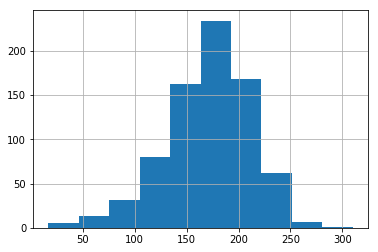

In [257]:
df['Bike ID'].value_counts().hist()

Distribution of Bike usage appears normal indicating the bikes are all used randomly. This is to be expected

In [258]:
df.describe()

,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID
count,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000
mean,22.587155,3042.568756,34.039216,-118.221176,3041.993597,34.034566,-118.206420,6193.698114
std,77.840790,30.970158,0.532694,1.849996,33.546514,0.652348,2.265617,293.303470
min,1.000000,3005.000000,0.000000,-118.472832,3005.000000,0.000000,-118.472832,4727.000000
25%,6.000000,3024.000000,34.044170,-118.256980,3023.000000,34.044159,-118.256981,5953.000000
50%,10.000000,3039.000000,34.046822,-118.250954,3038.000000,34.046810,-118.250954,6186.000000
75%,18.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238810,6434.000000
max,1440.000000,4108.000000,34.064281,0.000000,4108.000000,34.064281,0.000000,6728.000000


Starting Station Latitude, Starting Station Longitude, Ending Station Latitude & Ending Station Longitude contain zeros that must be treated as missing data. However, there are no zeros or any remaining missing values in Starting Station ID or Ending Station ID, we can use these values to umpute the missing data

In [259]:
df.loc[df['Starting Station Latitude']==0]['Starting Station ID'].value_counts()

4108.0    32
Name: Starting Station ID, dtype: int64

In [260]:
df.loc[df['Starting Station Longitude']==0]['Starting Station ID'].value_counts()

4108.0    32
Name: Starting Station ID, dtype: int64

In [261]:
df.loc[df['Ending Station Latitude']==0]['Ending Station ID'].value_counts()

4108.0    48
Name: Ending Station ID, dtype: int64

In [262]:
df.loc[df['Ending Station Longitude']==0]['Ending Station ID'].value_counts()

4108.0    48
Name: Ending Station ID, dtype: int64

All of the zeros were recorded at Bike Station 4108, there may be some kind of error related to this particular Bike Station. The values of this bike station's latitude and Longitude can be found in any of the complete values and imputed over the zeros

In [263]:
stat_4108_lat= df.loc[df['Starting Station ID']==4108]['Starting Station Latitude'].max() #use max to avoid the zeros
stat_4108_long= df.loc[df['Starting Station ID']==4108]['Starting Station Longitude'].min()
 #all non-zeroes are the same anyway no need to find and replace
df['Starting Station Latitude'].replace(0,stat_4108_lat,inplace=True)
df['Ending Station Latitude'].replace(0,stat_4108_lat,inplace=True)
df['Starting Station Longitude'].replace(0,stat_4108_long,inplace=True)
df['Ending Station Longitude'].replace(0,stat_4108_long,inplace=True)

In [265]:
df.describe()

,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID
count,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000
mean,22.587155,3042.568756,34.047546,-118.250122,3041.993597,34.047060,-118.249839,6193.698114
std,77.840790,30.970158,0.006358,0.011475,33.546514,0.006277,0.011983,293.303470
min,1.000000,3005.000000,33.987381,-118.472832,3005.000000,33.987381,-118.472832,4727.000000
25%,6.000000,3024.000000,34.044170,-118.256980,3023.000000,34.044159,-118.256981,5953.000000
50%,10.000000,3039.000000,34.046822,-118.250954,3038.000000,34.046810,-118.250954,6186.000000
75%,18.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238810,6434.000000
max,1440.000000,4108.000000,34.064281,-118.231277,4108.000000,34.064281,-118.231277,6728.000000


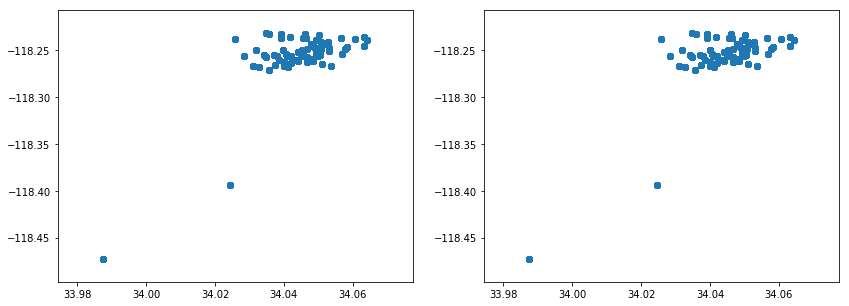

In [266]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(df['Starting Station Latitude'],df['Starting Station Longitude'],alpha=0.3)
plt.subplot(1,2,2)
plt.scatter(df['Ending Station Latitude'],df['Ending Station Longitude'],alpha=0.3)
plt.show()

Matching plots indicate there are no start points that had no drop off and vice-versa this would seem logical

In [165]:
sorted(df['Starting Station ID'].unique())==sorted(df['Ending Station ID'].unique())

True

This confirms that the Starting and Ending Stations sets are identical as expected

Now would a great time for a map!

In [166]:
import folium
bike_map1=folium.Map([df['Starting Station Latitude'].values[0],df['Starting Station Longitude'].values[0]])
for station in df['Starting Station ID'].unique():
    lat=df.loc[df['Starting Station ID']==station]['Starting Station Latitude'].values[0]
    lon=df.loc[df['Starting Station ID']==station]['Starting Station Longitude'].values[0]
    marker=folium.Marker([lat,lon],popup=str(station))
    marker.add_to(bike_map1)

bike_map1

Almost all the Bike Stations are located in Downtown LA with the exception of 2; 1 in Culver City(id = 3039), and 1 in Venice (id = 3009)

Lets look closer at the traffic to and from these 2 outlying bike stations, are they outliers?

In [167]:
df.loc[df['Starting Station ID']==3039]['Ending Station ID'].value_counts()

3039.0    77
3009.0    35
Name: Ending Station ID, dtype: int64

In [168]:
df.loc[df['Ending Station ID']==3039]['Starting Station ID'].value_counts()

3039.0    77
3009.0    26
3064.0     6
3005.0     2
3052.0     1
Name: Starting Station ID, dtype: int64

In [169]:
df.loc[df['Starting Station ID']==3009]['Ending Station ID'].value_counts()

3039.0    26
3009.0    25
Name: Ending Station ID, dtype: int64

In [170]:
df.loc[df['Ending Station ID']==3009]['Starting Station ID'].value_counts()

3039.0    35
3009.0    25
3011.0     1
3027.0     1
3005.0     1
3042.0     1
Name: Starting Station ID, dtype: int64

Almost all of the trips made to and from these bike stations are either round trips to the same place or from one of the two to the other. These two stations are almost completely disconnected from the Downtown LA network.

They also only account for a very tiny fraction of the rides total; from over 130k rides just 163 are to or from these two stations, I wonder why that is?

In [307]:
print('The first trip made FROM bike Station 3039 (Culver City) was on : ',df.loc[df['Starting Station ID']==3039]['Start Time'].min())
print('The last trip made FROM bike Station 3039 (Culver City) was on : ',df.loc[df['Starting Station ID']==3039]['Start Time'].max())
print('The first trip made FROM bike Station 3009 (Venice) was on : ',df.loc[df['Starting Station ID']==3009]['Start Time'].min())
print('The last trip made FROM bike Station 309 (Venice) was on : ',df.loc[df['Starting Station ID']==3009]['Start Time'].max())

print('The first trip made TO bike Station 3039 (Culver City) was on : ',df.loc[df['Ending Station ID']==3039]['Start Time'].min())
print('The last trip made TO bike Station 3039 (Culver City) was on : ',df.loc[df['Ending Station ID']==3039]['Start Time'].max())
print('The first trip made TO bike Station 3009 (Venice) was on : ',df.loc[df['Ending Station ID']==3009]['Start Time'].min())
print('The last trip made TO bike Station 309 (Venice) was on : ',df.loc[df['Ending Station ID']==3009]['Start Time'].max())

The first trip made FROM bike Station 3039 (Culver City) was on :  2017-03-26 07:30:00
The last trip made FROM bike Station 3039 (Culver City) was on :  2017-03-26 15:06:00
The first trip made FROM bike Station 3009 (Venice) was on :  2017-03-26 08:30:00
The last trip made FROM bike Station 309 (Venice) was on :  2017-03-26 15:31:00
The first trip made TO bike Station 3039 (Culver City) was on :  2017-03-26 07:30:00
The last trip made TO bike Station 3039 (Culver City) was on :  2017-03-26 15:31:00
The first trip made TO bike Station 3009 (Venice) was on :  2017-03-26 07:45:00
The last trip made TO bike Station 309 (Venice) was on :  2017-03-26 14:11:00


All these the trips to and from Culver City and Venice are on the same day; 2017-03-26 which is the last Weekned Day of the dataset. What may be the case is that this station was only operational beginning that day and these destinations are used much more heavily on the weekend (At the beach and near the beach).

Lets explore some of the distinctive characteristics of these other Bike Stations further:

In [279]:
df['Starting Station ID'].value_counts().tail(10)

3020.0    522
3010.0    420
3060.0    379
3057.0    371
3080.0    189
3045.0    185
3039.0    112
4108.0     53
3009.0     51
3053.0     15
Name: Starting Station ID, dtype: int64

In [280]:
df['Ending Station ID'].value_counts().tail(10)

3028.0    516
3010.0    406
3057.0    398
3060.0    390
3045.0    319
3080.0    173
3039.0    112
4108.0     70
3009.0     64
3053.0     12
Name: Ending Station ID, dtype: int64

Bike Station 4108, which was our station with the possible logging errors, also has relatively few trips to and from it, from the map it is a little separated from the rest of the downtown set

In [272]:
df.loc[df['Starting Station ID']==4108]['Trip Route Category'].value_counts(normalize=True)

Round Trip    0.735849
One Way       0.264151
Name: Trip Route Category, dtype: float64

In [271]:
df.loc[df['Ending Station ID']==4108]['Trip Route Category'].value_counts(normalize=True)

Round Trip    0.557143
One Way       0.442857
Name: Trip Route Category, dtype: float64

Bike Station ID 4108 is dominantly Round-Trip traffic, this is very unusual for this dataset! 

Bike Station 3053 has the least number of rides to and from it but it appears to be right in the mix of things

In [276]:
df.loc[df['Starting Station ID']==3053]['Start Time']

Trip ID
2137435   2016-07-09 12:42:00
2057407   2016-07-08 17:46:00
2419835   2016-07-11 07:50:00
2057407   2016-07-08 17:46:00
2419835   2016-07-11 07:50:00
2116360   2016-07-09 07:12:00
2321036   2016-07-10 17:42:00
2419838   2016-07-11 07:32:00
2335086   2016-07-10 15:41:00
2019541   2016-07-08 08:39:00
2176181   2016-07-09 19:11:00
2314140   2016-07-10 15:18:00
2062197   2016-07-08 18:22:00
2169928   2016-07-09 18:40:00
2137436   2016-07-09 12:42:00
Name: Start Time, dtype: datetime64[ns]

In [304]:
df.loc[df['Ending Station ID']==3053]['Start Time']

Trip ID
2067007   2016-07-08 19:03:00
2152686   2016-07-09 15:49:00
2066991   2016-07-08 19:33:00
2158281   2016-07-09 16:35:00
2188763   2016-07-09 21:37:00
2426970   2016-07-11 08:05:00
2158278   2016-07-09 16:36:00
2280145   2016-07-10 10:58:00
2170049   2016-07-09 17:50:00
2116315   2016-07-09 07:36:00
1947931   2016-07-07 13:51:00
2188775   2016-07-09 20:55:00
Name: Start Time, dtype: datetime64[ns]

In [308]:
print('The first trip made FROM bike Station 3053 was on : ',df.loc[df['Starting Station ID']==3053]['Start Time'].min())
print('The last trip made FROM bike Station 3053 was on : ',df.loc[df['Starting Station ID']==3053]['Start Time'].max())
print('The first trip made TO bike Station 3053 was on : ',df.loc[df['Ending Station ID']==3053]['Start Time'].min())
print('The last trip made TO bike Station 30053 was on : ',df.loc[df['Ending Station ID']==3053]['Start Time'].max())

The first trip made from bike Station 3053 was on :  2016-07-08 08:39:00
The last trip made from bike Station 3053 was on :  2016-07-11 07:50:00
The first trip made TO bike Station 3053 was on :  2016-07-07 13:51:00
The last trip made TO bike Station 30053 was on :  2016-07-11 08:05:00


All trips made over just 5 days from the 7th of July 2016 (the first day of the dataset) to the 11th of July 2016. Is it possible this Bike Station was decomissioned? 

In [176]:
df['Start Time'].min()

Timestamp('2016-07-07 04:17:00')

In [287]:
df['Start Time'].max()

Timestamp('2017-03-31 23:45:00')

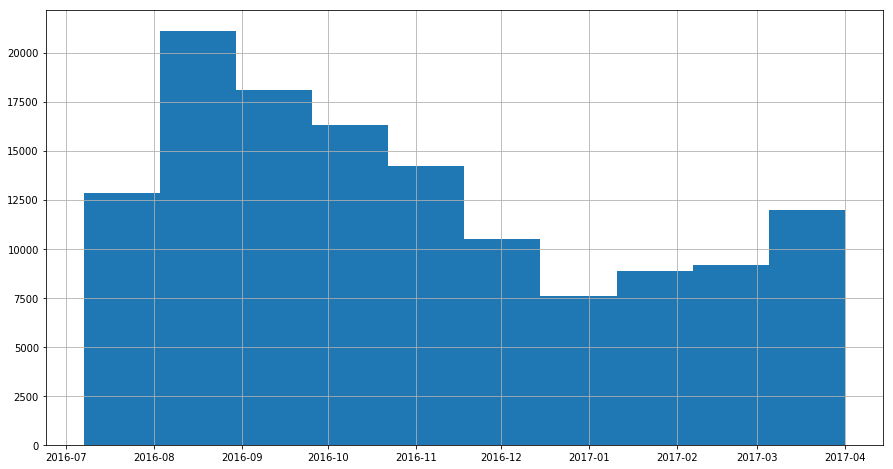

In [294]:
df['Start Time'].hist(figsize=(15,8))


In [179]:
day_of_week=df['Start Time'].dt.day_name()
day_of_week.head()

Trip ID
17848847      Friday
20700706      Friday
20595730    Thursday
17307719    Thursday
18941656      Monday
Name: Start Time, dtype: object

In [180]:
day_of_week.value_counts()

Thursday     20082
Friday       19774
Wednesday    19537
Tuesday      18909
Saturday     18278
Sunday       17040
Monday       17035
Name: Start Time, dtype: int64

In [181]:
month=df['Start Time'].dt.month_name()

In [182]:
month.value_counts()

August       24121
September    19846
October      17863
November     14196
March        13564
July         11412
December     10327
January      10053
February      9273
Name: Start Time, dtype: int64

<BarContainer object of 7 artists>

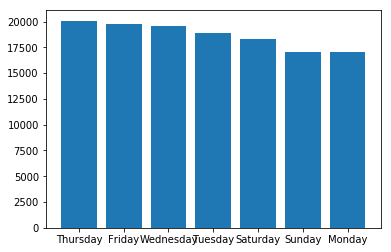

In [183]:
plt.bar(day_of_week.value_counts().index,day_of_week.value_counts().values)

In [184]:
df.groupby('Trip Route Category')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Trip Route Category,,,,,,,,
One Way,118030.0,19.113310,69.338189,1.0,6.0,10.0,16.0,1440.0
Round Trip,12625.0,54.987485,128.850483,1.0,15.0,28.0,53.0,1440.0


In [185]:
df.groupby('Passholder Type')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Passholder Type,,,,,,,,
Flex Pass,9465.0,17.804226,63.569293,1.0,7.0,10.0,15.0,1440.0
Monthly Pass,80443.0,12.918949,41.680624,1.0,5.0,8.0,13.0,1440.0
Walk-up,40747.0,42.761553,120.272538,1.0,11.0,19.0,34.0,1440.0


In [186]:
df.groupby('Passholder Type')['Trip Route Category'].value_counts(normalize=True)

Passholder Type  Trip Route Category
Flex Pass        One Way                0.948653
                 Round Trip             0.051347
Monthly Pass     One Way                0.954117
                 Round Trip             0.045883
Walk-up          One Way                0.792672
                 Round Trip             0.207328
Name: Trip Route Category, dtype: float64

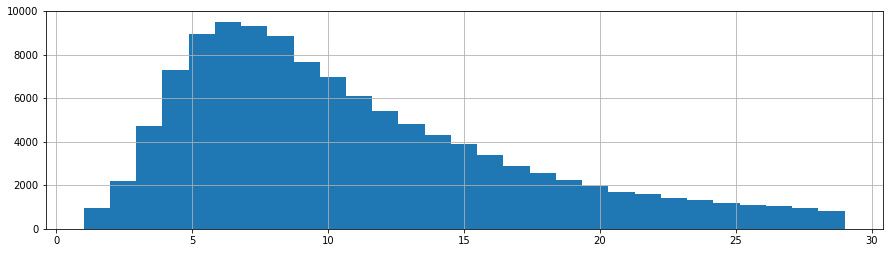

In [187]:
plt.figure(figsize=(15,4))
df.loc[df.Duration<30]['Duration'].hist(bins=29)
# plt.ylim(0,30000)
# plt.xlim(0,5000)

Notes:
create distance ridden metric <i>nope</i> (drop return trips? only 10%) 

corellate distance/duration?

insert day of week

bin start time? morning/afternoon/evening?

clustering of stations? <i> 1 main cluster really</i>


machine learning:
ride duration classifier?
pickups from station per day/time period?
